**Практическая работа №11**. Разведывательный анализ данных и прогнозирование рейтинга шоколадных батончиков

**Задача**: анализ данных о шоколадных батончиках и подготовка модели для прогнозирования рейтинга.

**Алгоритм работы**:

1. С помощью pandas.read_csv загружается файл "./Data/cacao_flavors.csv".

2. Проверяются данные на пустые значения и дубликаты; строки с пропусками в Bean Type и Broad Bean Origin удаляются.

3. Приводятся названия колонок к корректному виду (убраны переносы и лишние пробелы).

4. Колонка Cocoa Percent преобразуется в числовой тип: удаляются символы %.

5. С помощью boxplot анализируются выбросы в столбцах Rating и Cocoa Percent.

6. Отбираются данные, пригодные для построения модели:

 6.1. Целевая переменная: Rating
 6.2. Признаки: Cocoa Percent, Bean Type, Broad Bean Origin, Company Location

7. Категориальные признаки кодируются через OneHotEncoding.

8. Деление данных на обучающую и тестовую выборки (80%/20%).

9. Построение и обучение модели (LinearRegression) на обучающих данных.

10. Проверка качества модели с использованием метрик:

    10.1. MAE (средняя абсолютная ошибка)

    10.2. RMSE (квадратный корень из средней квадратичной ошибки)

    10.2. R² (коэффициент детерминации)

    10.3. Коэффициенты модели (coef_) и смещение (intercept_).

11. Возможность прогнозирования рейтинга нового шоколадного батончика по заданным признакам.

In [21]:
#Тут всё более чем базово, даже смысла нет объяснениях,а, и кстати, тут был .csv(а не .xlx как в задании по этому делаю с ним)
#это основной фрагмент для работы с остальными работами, я их разделил чтобы не было проблем с их чтением и разделением

import pandas as pd
Data = pd.read_csv("./Data/cacao_flavors.csv")
print(f"""
    Первые 5 элементов: 
  
    {Data.head()}
   
    
    Информация об таблице: {Data.info() if Data.info() != None else "Не обнаруженно"}


   Статистические данные:
   {Data.describe()}   
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB

    Первые 5 элементов: 

       Bar id Company \n(Maker-if known) Speci

In [22]:
print(f"Суммарное количество незаполненых ячеек в: \n{Data.isnull().sum()}")

Суммарное количество незаполненых ячеек в: 
Bar id                               0
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64


In [24]:
print(f" Дублей сейчас: {Data.duplicated().sum()}")
a = input("Избавиться от них?[Y/N]: ")
if 'y' in a.lower(): Data.drop_duplicates()


 Дублей сейчас: 0


Избавиться от них?[Y/N]:  Y


Проверка на выбросы


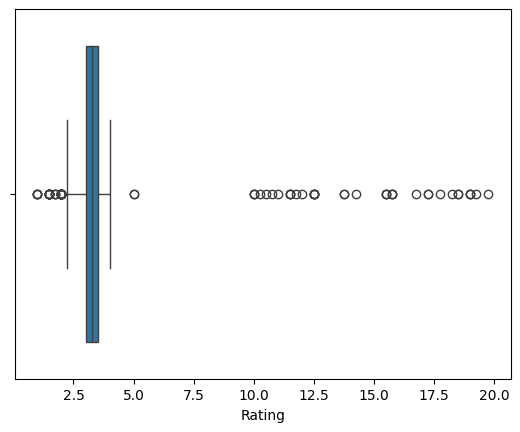

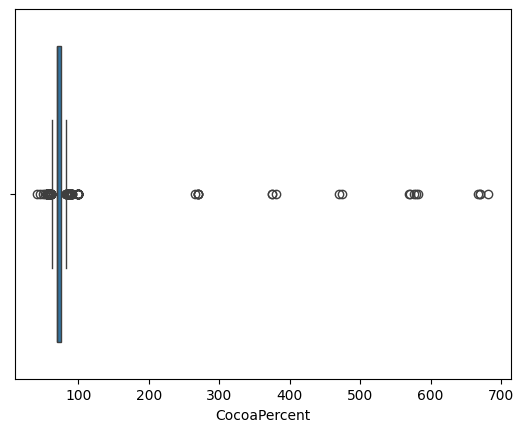

In [37]:
print("Проверка на выбросы")
Data['CocoaPercent'] = Data['CocoaPercent'].astype(str).str.rstrip('%').astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=Data['Rating'])
plt.show()

sns.boxplot(x=Data['CocoaPercent'])
plt.show()


DataModel = Data[['CocoaPercent', 'BeanType', 'CompanyLocation', 'Rating']]
DataModelKodKat = pd.get_dummies(DataModel, columns=['BeanType','CompanyLocation'], drop_first=True)
X = DataModelKodKat.drop('Rating', axis=1)
y = DataModelKodKat['Rating']
print(f"""
    Только пригодные столбцы: {DataModel}
    Категориальные столбцы{ DataModelKodKat }
    Разделение на X и Y данные:
    X:  {X}
    Y:  {y}
""")

In [46]:
#Этот код Целиком скопирован с прошлой лабы, его описывать смысла 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(Xtr, Ytr)

Yp = model.predict(Xte)
print(f"""
 Тест модели
 MAE: {mean_absolute_error(Yte, Yp)}
 RMSE: {np.sqrt(mean_squared_error(Yte, Yp))}
 R^2: {r2_score(Yte, Yp)}
""")


 Тест модели
 MAE: 0.6079923179094849
 RMSE: 1.5049291655169055
 R^2: -0.019673883946774717



**Ответы на вопросы**:
1. Первичный осмотр данных
1.1 Числовые столбцы

Числовых столбцов: 4 (bar_id, ref, review_date, rating)

1.2 Строковые столбцы

Строковых столбцов: 6 (company, specific_origin, cocoa_percent, company_location, bean_type, broad_origin)

1.3 Переименование столбцов
title_col=['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

1.4 Анализ данных по столбцам

1.4.1 bar_id

Уникальных значений: 1795 (каждая запись уникальна)

График: гистограмма распределения ID (равномерно от 1 до 1795)

1.4.2 company

Всего компаний: ~600

Компаний с более чем 10 продуктами: 35

Вывод: значимая часть компаний имеет малое количество батончиков, их можно игнорировать для анализа

1.4.3 specific_origin

Уникальных регионов: 220

Регионов, встречающихся более 10 раз: 15

1.4.4 ref

График распределения: большинство значений в диапазоне 500–1500

Аномалии: отдельные значения <10 (возможно ошибка ввода)

Пропусков: нет

1.4.5 review_date

График распределения: 2006–2017, пик в 2015–2016

Аномалии: отдельные значения (например, 5)

Пропусков: нет

Выбросы: есть, удалены

1.4.6 cocoa_percent

Преобразовано в float (убран %)

Среднее: 70%

Аномалии: значения >100% (например, 670%)

Пропусков: нет

Выбросы удалены

График распределения: большинство батончиков 60–75%

1.4.7 company_location

Всего стран: 50+

Стран с более 10 отзывами: 25

1.4.8 rating

Целевая переменная

Выбросы: значения >5, удалены

График распределения после фильтрации: 1–5

Среднее: 3.42

1.4.9 bean_type

Пропусков: 1 строка

Значений, встречающихся >10 раз: 6

Отфильтровано: строки с пропусками удалены

1.4.10 broad_origin

Пропусков: 1 строка

Значений, встречающихся >10 раз: 30

Уникальных значений: 79

Коррекция повторяющихся написаний: приведено к единообразной капитализации

После исправления: уникальных значений 65, встречающихся >10 раз — 28

2. Корреляционный анализ числовых данных

Матрица корреляций между bar_id, ref, review_date, rating

Вывод: слабая корреляция между rating и другими числовыми столбцами, линейная зависимость практически отсутствует.

3. Анализ номинативных переменных

Построены графики распределения для:

company

specific_origin

bean_type

broad_origin

company_location

Вывод: большинство категорий имеют малое количество записей; для модели оставлены только часто встречающиеся значения (>10)